# Tasks
1. Function to measure cosine distance between face descriptors. It is useful to be able to take in a shape-(M, D) array of M descriptor vectors and a shape-(N, D) array of N descriptor vectors, and compute a shape-(M, N) array of cosine distances – this holds all MxN combinations of pairwise cosine distances.
2. Functionality to display an image with a box around detected faces with labels to indicate matches or an “Unknown” label otherwise

In [1]:
%matplotlib notebook

In [3]:
import numpy as np
from facenet_models import FacenetModel
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.pyplot import text

from PIL import Image

from CogBook import query_database

## Task 1: Cosine Distance Function

In [ ]:
def cos_distance (d1, d2):
    """
    Calculates the cosine distance between two descriptor vectors.

    Parameters
    ----------
    d1 : numpy.ndarray, shape-(M, D)
        The first descriptor vector, an array of M descriptor vectors.

    d2 : numpy.ndarray, shape-(N, D)
        The second descriptor vector, an array of N descriptor vectors.
    
    Returns
    -------
    numpy.ndarray, shape-(M, N)
        An array of cosine distances which holds all MxN combination so of pairwise cosine distances.
    """
    d1_mag = np.linalg.norm(d1, axis=1)
    d2_mag = np.linalg.norm(d2, axis=1)
    return 1 - ( np.matmul(d1, d2.T) / (d1_mag * d2_mag) )

In [ ]:
a = np.array([[3, 4]])
b = np.array([[5, 12]])

cos_distance(a, b)

## Task 2: Draw boxes around people's faces and label

In [4]:
def get_descriptors(image_data):
    """
    Returns a descriptors numpy array.

    Parameters
    ----------
    image_data : numpy.ndarray, shape-(R, C, 3) (RGB is the last dimension)
        Pixel information for the image.
    
    Returns
    -------
    np.ndarray, shape-(N, 512)
        The descriptor vectors, where N is the number of faces.
    """
    
    model = FacenetModel()
    boxes, probabilities, _ = model.detect(image_data)
    descriptors = model.compute_descriptors(image_data, boxes)
    print (descriptors.shape)
    return descriptors

def label_faces(image_data):
    """
    Displays an image with boxes around people's faces and labels them with names.

    Parameters
    ----------
    image_data : numpy.ndarray, shape-(R, C, 3) (RGB is the last dimension)
        Pixel information for the image.
    """
    
    # this will download the pretrained weights (if they haven't already been fetched)
    # which should take just a few seconds
    model = FacenetModel()

    # detect all faces in an image
    # returns a tuple of (boxes, probabilities, landmarks)
    boxes, probabilities, _ = model.detect(image_data)

    # producing a face descriptor for each face
    # returns a (N, 512) array, where N is the number of boxes
    # and each descriptor vector is 512-dimensional
    fig, ax = plt.subplots()
    ax.imshow(image_data)
    if (boxes is None):
        x = image_data.shape[1] // 2
        y = image_data.shape[0] // 2
        ax.text(x, y,
                "GIMME A FACE",
                size=50,
                va="center",
                ha="center",
                bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8),))
        return
    descriptors = model.compute_descriptors(image_data, boxes)

    names = []
    for d in descriptors:
        names.append(query_database(d).capitalize())

    i = 0
    for box, prob in zip(boxes, probabilities):
        # draw the box on the screen
        ax.add_patch(Rectangle(box[:2], *(box[2:] - box[:2]), fill=None, lw=2, color="red"))
        # add names to the box
        ax.text(*box[:2],
                names[i],
                size=12,
                va="center",
                bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8),))
        i += 1

In [6]:
fpath = "../Images/"
img_path = fpath + "evan_1.png"
pic = np.array(Image.open(img_path))[:,:,:3]
# print(pic.shape)
# fig, ax = plt.subplots()
# ax.imshow(pic)
# ax.text(-2.5, 0.5, "NAME TEST?")

# d = get_descriptors(pic)

<IPython.core.display.Javascript object>


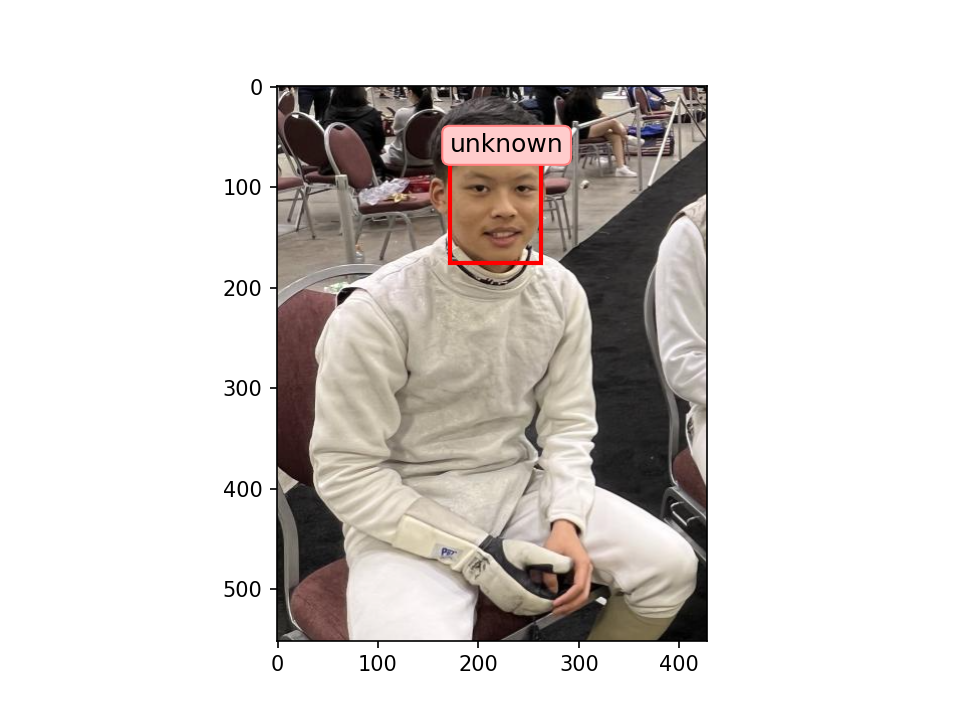

BOX: [171.4204    58.167618 262.08047  175.7791  ]


In [7]:
label_faces(pic)